In [5]:
# API KEY Loading
from dotenv import load_dotenv

load_dotenv()

True

### LangSmith 설정

- https://smith.langchain.com
- 회원가입 후 KEY 발급 
- ".env" 파일에 등록 : LANGCHAIN_API_KEY

In [ ]:
# LangSmith 추적 설정
# teddynote 에서 제공하는 패키지 활용
# !pip install -qU langchain-teddynote

In [6]:
from langchain_teddynote import logging

logging.langsmith("CH01-Basic")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH01-Basic


# OpenAI LLM

- https://platform.openai.com/docs/models

In [7]:
from langchain_openai import ChatOpenAI

## 기본 구조

In [8]:
# 객체 생성
llm = ChatOpenAI(
    temperature=0.2,  # 창의서 (0.0 ~ 2.0)
    model_name="gpt-4o-mini",
)

# 질의 내용
question = "대한민국의 언어는 무엇인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

[답변]: content='대한민국의 공식 언어는 한국어입니다. 한국어는 한글이라는 고유의 문자 체계를 사용하며, 한국의 문화와 역사에 깊은 연관이 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 17, 'total_tokens': 57, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None} id='run-b0169e4a-b3b0-414b-8af0-961401723bce-0' usage_metadata={'input_tokens': 17, 'output_tokens': 40, 'total_tokens': 57, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


## 답변 

In [9]:
# 질의 내용
question = "대한민국의 언어는 무엇인가요?"

# 질의
response = llm.invoke(question)

In [10]:
response

AIMessage(content='대한민국의 공식 언어는 한국어입니다. 한국어는 한글이라는 고유한 문자 체계를 사용하며, 한국의 문화와 역사에 깊은 연관이 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 17, 'total_tokens': 57, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-64a5d176-a414-4507-9136-3368184c9c1b-0', usage_metadata={'input_tokens': 17, 'output_tokens': 40, 'total_tokens': 57, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
response.content

'대한민국의 공식 언어는 한국어입니다. 한국어는 한글이라는 고유한 문자 체계를 사용하며, 한국의 문화와 역사에 깊은 연관이 있습니다.'

In [12]:
print(response.content)

대한민국의 공식 언어는 한국어입니다. 한국어는 한글이라는 고유한 문자 체계를 사용하며, 한국의 문화와 역사에 깊은 연관이 있습니다.


In [13]:
response.response_metadata

{'token_usage': {'completion_tokens': 40,
  'prompt_tokens': 17,
  'total_tokens': 57,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_72ed7ab54c',
 'finish_reason': 'stop',
 'logprobs': None}

In [14]:
response.response_metadata["token_usage"]

{'completion_tokens': 40,
 'prompt_tokens': 17,
 'total_tokens': 57,
 'completion_tokens_details': {'accepted_prediction_tokens': 0,
  'audio_tokens': 0,
  'reasoning_tokens': 0,
  'rejected_prediction_tokens': 0},
 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}

## 확률

- LogProb = True
- 주어진 텍스트에 대한 모델의 토큰 확률의 로그값 
- 토큰 : 문장을 구성하는 개별 단어나 문자 등의 요소 
- 확률 : 모델이 해당 토큰을 에측할 확률

In [20]:
# 객체 생성
llm_with_logprob = ChatOpenAI(
    temperature=0.2,  # 창의서 (0.0 ~ 2.0)
    max_tokens=2048,
    model_name="gpt-4o-mini",
).bind(logprobs=True)

In [ ]:
# 질의 내용
question = "대한민국의 언어는 무엇인가요?"

# 질의
response = llm_with_logprob.invoke(question)

In [22]:
# 질의 결과 출력
response.response_metadata

{'token_usage': {'completion_tokens': 40,
  'prompt_tokens': 17,
  'total_tokens': 57,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_72ed7ab54c',
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대한',
    'bytes': [235, 140, 128, 237, 149, 156],
    'logprob': -4.739826e-05,
    'top_logprobs': []},
   {'token': '민국',
    'bytes': [235, 175, 188, 234, 181, 173],
    'logprob': -9.0883464e-07,
    'top_logprobs': []},
   {'token': '의',
    'bytes': [236, 157, 152],
    'logprob': -8.017927e-05,
    'top_logprobs': []},
   {'token': ' 공식',
    'bytes': [32, 234, 179, 181, 236, 139, 157],
    'logprob': -0.017438522,
    'top_logprobs': []},
   {'token': ' 언',
    'bytes': [32, 236, 150, 184],
    'logprob': -9.841743e-05,
    'top_logprob

## Streaming

- 질의 대한 답변을 스트리밍 형태로 출력하고자 할 때 사용 
- Application 답변 출력 시 유용

In [25]:
# answer에 스트리밍 답변 결과를 받음
answer = llm.stream(
    "대한민국의 유명한 축제 10개 이름, 주소, 24년 개최일자를 알려주세요"
)

In [ ]:
# 스트리밍 방식으로 출력
for token in answer:
    print(token.content, end="", flush=True)

대한민국의 유명한 축제 10개와 그 주소, 2024년 개최일자를 아래에 정리해 드리겠습니다.

1. **진주남강유등축제**
   - **주소**: 경상남도 진주시 남강로 1
   - **2024년 개최일자**: 2024년 10월 1일 ~ 10월 15일

2. **부산국제영화제**
   - **주소**: 부산광역시 해운대구 APEC로 55
   - **2024년 개최일자**: 2024년 10월 3일 ~ 10월 12일

3. **전주국제영화제**
   - **주소**: 전라북도 전주시 완산구 전주객사 1
   - **2024년 개최일자**: 2024년 4월 25일 ~ 5월 4일

4. **안동국제탈춤페스티벌**
   - **주소**: 경상북도 안동시 태사길 139
   - **2024년 개최일자**: 2024년 9월 27일 ~ 10월 6일

5. **서울세계불꽃놀이축제**
   - **주소**: 서울특별시 동대문구 청량리동 1
   - **2024년 개최일자**: 2024년 10월 5일

6. **강릉단오제**
   - **주소**: 강원도 강릉시 단오장길 1
   - **2024년 개최일자**: 2024년 6월 6일 ~ 6월 10일

7. **보령머드축제**
   - **주소**: 충청남도 보령시 머드광장 1
   - **2024년 개최일자**: 2024년 7월 12일 ~ 7월 21일

8. **여수밤바다불꽃축제**
   - **주소**: 전라남도 여수시 여수밤바다 1
   - **2024년 개최일자**: 2024년 8월 10일

9. **춘천마임축제**
   - **주소**: 강원도 춘천시 중앙로 1
   - **2024년 개최일자**: 2024년 5월 1일 ~ 5월 5일

10. **경주벚꽃축제**
    - **주소**: 경상북도 경주시 보문로 1
    - **2024년 개최일자**: 2024년 4월 6일 ~ 4월 14일

위의 정보는 2024년 기준으로 예상되는 개최일자이며, 실제 일정은 변동될 수 있으니 사전에 확인하시기 바랍니다.

In [27]:
# 코드 정리
from langchain_teddynote.messages import stream_response

question = "대한민국의 유명한 축제 10개 이름, 주소, 24년 개최일자를 알려주세요"
answer = llm.stream(question)
stream_response(answer)

대한민국의 유명한 축제 10개와 그 주소, 2024년 개최일자를 아래에 정리해 드리겠습니다.

1. **진주 남강 유등축제**
   - **주소**: 경상남도 진주시 남강로 1
   - **2024년 개최일자**: 2024년 9월 27일 ~ 10월 13일

2. **부산 국제 영화제**
   - **주소**: 부산광역시 해운대구 수영강변대로 120
   - **2024년 개최일자**: 2024년 10월 3일 ~ 10월 12일

3. **전주 국제 영화제**
   - **주소**: 전라북도 전주시 완산구 전주객사1길 20
   - **2024년 개최일자**: 2024년 4월 25일 ~ 5월 4일

4. **안동 국제 탈춤 페스티벌**
   - **주소**: 경상북도 안동시 풍천면 탈춤로 1
   - **2024년 개최일자**: 2024년 10월 4일 ~ 10월 8일

5. **서울 Lantern Festival (서울 빛초롱축제)**
   - **주소**: 서울특별시 종로구 청계천로 1
   - **2024년 개최일자**: 2024년 11월 1일 ~ 11월 17일

6. **여수 엑스포**
   - **주소**: 전라남도 여수시 엑스포로 1
   - **2024년 개최일자**: 2024년 5월 1일 ~ 5월 31일

7. **강릉 단오제**
   - **주소**: 강원도 강릉시 단오장길 1
   - **2024년 개최일자**: 2024년 6월 6일 ~ 6월 10일

8. **춘천 마임축제**
   - **주소**: 강원도 춘천시 중앙로 1
   - **2024년 개최일자**: 2024년 5월 1일 ~ 5월 5일

9. **제주 유채꽃 축제**
   - **주소**: 제주특별자치도 제주시 애월읍 유채꽃길
   - **2024년 개최일자**: 2024년 3월 1일 ~ 4월 30일

10. **경주 보문관광단지 벚꽃축제**
    - **주소**: 경상북도 경주시 보문로 1
    - **2024년 개최일자**: 2024년 4월 1일 ~ 4월 10일

각 축제의 일정

## Prompt Caching

- https://platform.openai.com/docs/guides/prompt-caching
- 상황 : 빈번하게 유사한 내용의 질의 내용이 호출되어 비용 발생 
- 장점 : 반복적으로 입력으로 들어가는 토큰을 캐싱에 저장하여 비용 절감 
- 권장 : 캐싱에 활용할 토큰은 PREFIX 구분 

In [28]:
very_long_prompt = """
당신은 매우 친절한 AI 어시스턴트 입니다. 
당신의 임무는 주어진 질문에 대해 친절하게 답변하는 것입니다.
아래는 사용자의 질문에 답변할 때 참고할 수 있는 정보입니다.
주어진 정보를 참고하여 답변해 주세요.

<WANT_TO_CACHE_HERE>
#참고:
**Prompt Caching**
Model prompts often contain repetitive content, like system prompts and common instructions. OpenAI routes API requests to servers that recently processed the same prompt, making it cheaper and faster than processing a prompt from scratch. This can reduce latency by up to 80% and cost by 50% for long prompts. Prompt Caching works automatically on all your API requests (no code changes required) and has no additional fees associated with it.

Prompt Caching is enabled for the following models:

gpt-4o (excludes gpt-4o-2024-05-13 and chatgpt-4o-latest)
gpt-4o-mini
o1-preview
o1-mini
This guide describes how prompt caching works in detail, so that you can optimize your prompts for lower latency and cost.

Structuring prompts
Cache hits are only possible for exact prefix matches within a prompt. To realize caching benefits, place static content like instructions and examples at the beginning of your prompt, and put variable content, such as user-specific information, at the end. This also applies to images and tools, which must be identical between requests.

How it works
Caching is enabled automatically for prompts that are 1024 tokens or longer. When you make an API request, the following steps occur:

Cache Lookup: The system checks if the initial portion (prefix) of your prompt is stored in the cache.
Cache Hit: If a matching prefix is found, the system uses the cached result. This significantly decreases latency and reduces costs.
Cache Miss: If no matching prefix is found, the system processes your full prompt. After processing, the prefix of your prompt is cached for future requests.
Cached prefixes generally remain active for 5 to 10 minutes of inactivity. However, during off-peak periods, caches may persist for up to one hour.

Requirements
Caching is available for prompts containing 1024 tokens or more, with cache hits occurring in increments of 128 tokens. Therefore, the number of cached tokens in a request will always fall within the following sequence: 1024, 1152, 1280, 1408, and so on, depending on the prompt's length.

All requests, including those with fewer than 1024 tokens, will display a cached_tokens field of the usage.prompt_tokens_details chat completions object indicating how many of the prompt tokens were a cache hit. For requests under 1024 tokens, cached_tokens will be zero.

What can be cached
Messages: The complete messages array, encompassing system, user, and assistant interactions.
Images: Images included in user messages, either as links or as base64-encoded data, as well as multiple images can be sent. Ensure the detail parameter is set identically, as it impacts image tokenization.
Tool use: Both the messages array and the list of available tools can be cached, contributing to the minimum 1024 token requirement.
Structured outputs: The structured output schema serves as a prefix to the system message and can be cached.
Best practices
Structure prompts with static or repeated content at the beginning and dynamic content at the end.
Monitor metrics such as cache hit rates, latency, and the percentage of tokens cached to optimize your prompt and caching strategy.
To increase cache hits, use longer prompts and make API requests during off-peak hours, as cache evictions are more frequent during peak times.
Prompts that haven't been used recently are automatically removed from the cache. To minimize evictions, maintain a consistent stream of requests with the same prompt prefix.
Frequently asked questions
How is data privacy maintained for caches?

Prompt caches are not shared between organizations. Only members of the same organization can access caches of identical prompts.

Does Prompt Caching affect output token generation or the final response of the API?

Prompt Caching does not influence the generation of output tokens or the final response provided by the API. Regardless of whether caching is used, the output generated will be identical. This is because only the prompt itself is cached, while the actual response is computed anew each time based on the cached prompt. 

Is there a way to manually clear the cache?

Manual cache clearing is not currently available. Prompts that have not been encountered recently are automatically cleared from the cache. Typical cache evictions occur after 5-10 minutes of inactivity, though sometimes lasting up to a maximum of one hour during off-peak periods.

Will I be expected to pay extra for writing to Prompt Caching?

No. Caching happens automatically, with no explicit action needed or extra cost paid to use the caching feature.

Do cached prompts contribute to TPM rate limits?

Yes, as caching does not affect rate limits.

Is discounting for Prompt Caching available on Scale Tier and the Batch API?

Discounting for Prompt Caching is not available on the Batch API but is available on Scale Tier. With Scale Tier, any tokens that are spilled over to the shared API will also be eligible for caching.

Does Prompt Caching work on Zero Data Retention requests?

Yes, Prompt Caching is compliant with existing Zero Data Retention policies.
</WANT_TO_CACHE_HERE>

#Question:
{}

"""

In [29]:
from langchain.callbacks import get_openai_callback

In [30]:
with get_openai_callback() as cb:
    # 답변 요청
    answer = llm.invoke(
        very_long_prompt.format("프롬프트 캐싱 기능에 대해 3문장으로 설명해 주세요")
    )
    print(cb)

    # 캐싱된 토큰 출력
    cached_tokens = answer.response_metadata["token_usage"]["prompt_tokens_details"][
        "cached_tokens"
    ]
    print(f"캐싱된 토큰: {cached_tokens}")

Tokens Used: 1236
	Prompt Tokens: 1139
		Prompt Tokens Cached: 1024
	Completion Tokens: 97
		Reasoning Tokens: 0
Successful Requests: 1
Total Cost (USD): $0.00015225
캐싱된 토큰: 1024


## Multimodal

- 멀티모달은 여러 데이터 포맷의 정보를 통합 처리하는 기술 또는 접근 방식 
- gpt-4o, gpt-4-turbo 모델부터 이미지 인식 기능이 추가됨 

In [32]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

In [34]:
# Sample Image
sample_image_url = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"


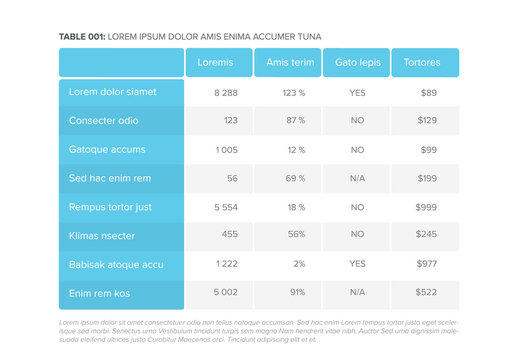

The image is a table with a header labeled "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA." It contains several columns with headings in blue boxes: "Loremis," "Amis terim," "Gāto lepis," and "Tortores."

### Columns and Data:

1. **Loremis**
   - Contains numerical values, possibly representing quantities or scores.
   - Examples: 8,288; 123; 1,005.

2. **Amis terim**
   - Contains percentages, possibly indicating growth rates or proportions.
   - Examples: 123%; 87%; 12%.

3. **Gāto lepis**
   - Contains "YES," "NO," or "N/A," possibly indicating a binary status or availability.
   - Examples: YES; NO; N/A.

4. **Tortores**
   - Contains monetary values, possibly representing prices or costs.
   - Examples: $89; $129; $199.

### Rows:

Each row has a label in the first column, which appears to be placeholder text (e.g., "Lorem dolor siamet," "Consecter odio"). The rows contain corresponding data for each column.

### Footer:

There is a block of placeholder text at the bottom,

In [35]:
# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o",
)

# Multimodal 객체 생성
multimodal_llm = MultiModal(llm)

# 질의
answer = multimodal_llm.stream(sample_image_url)

# 결과
stream_response(answer)

## System/User Prompt

In [36]:
system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 
당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""

In [37]:
sample_image_path = "./images/sample-image.png"

In [38]:
# Multimodal 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm,
    system_prompt=system_prompt,
    user_prompt=user_prompt,
)

# 질의
answer = multimodal_llm_with_prompt.stream(sample_image_path)

# 결과 출력
stream_response(answer)

주어진 재무제표에서 몇 가지 흥미로운 사실을 정리해보겠습니다.

1. **유동자산 감소**: 
   - 제 19기(2019년)에는 유동자산이 8,349,633백만원으로, 제 18기(2018년) 8,602,837백만원에 비해 감소했습니다. 이는 현금 및 현금성 자산의 감소가 주요 원인으로 보입니다.

2. **현금 및 현금성 자산 감소**:
   - 제 19기에는 1,002,263백만원으로, 제 18기 1,690,862백만원에 비해 크게 감소했습니다. 이는 회사의 유동성에 영향을 미칠 수 있습니다.

3. **매출채권 감소**:
   - 매출채권은 제 19기에 3,981,935백만원으로, 제 18기 4,004,920백만원에 비해 소폭 감소했습니다.

4. **기타수취채권 증가**:
   - 제 19기에는 366,141백만원으로, 제 18기 321,866백만원에 비해 증가했습니다.

5. **비유동자산 증가**:
   - 비유동자산은 제 19기에 18,677,453백만원으로, 제 18기 15,127,741백만원에 비해 크게 증가했습니다. 이는 장기적인 투자나 자산 증가를 의미할 수 있습니다.

6. **재고자산 증가**:
   - 제 19기에는 2,670,294백만원으로, 제 18기 2,426,364백만원에 비해 증가했습니다. 이는 생산 증가나 판매 감소를 나타낼 수 있습니다.

이러한 변화들은 회사의 재무 상태와 운영 전략에 대한 중요한 단서를 제공할 수 있습니다.

-----
* End of Document *